youtube video to follow -> https://www.youtube.com/watch?v=Q7mS1VHm3Yw&ab_channel=freeCodeCamp.org

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
import kagglehub
path = kagglehub.dataset_download("deepcontractor/marvel-comic-books")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/Marvel_Comics.csv")
df.head()

Path to dataset files: C:\Users\arturk\.cache\kagglehub\datasets\deepcontractor\marvel-comic-books\versions\4


,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34466 non-null  object
 3   publish_date       34466 non-null  object
 4   issue_description  30395 non-null  object
 5   penciler           25482 non-null  object
 6   writer             27595 non-null  object
 7   cover_artist       12255 non-null  object
 8   Imprint            11684 non-null  object
 9   Format             32894 non-null  object
 10  Rating             12619 non-null  object
 11  Price              32894 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


In [200]:
df.isna().sum()

comic_name               0
active_years             0
issue_title            526
publish_date           526
issue_description     4597
penciler              9510
writer                7397
cover_artist         22737
Imprint              23308
Format                2098
Rating               22373
Price                 2098
dtype: int64

In [201]:
#renaming some columns for consistency
df = df.rename(columns = {"Imprint":"imprint","Format":"format","Rating":"rating","Price":"price"})

In [202]:
df_size_1 = df.size

df["issue_title"] = df["issue_title"].fillna(df["comic_name"])
df["penciler"] = df["penciler"].fillna("Unknown")
df["writer"] = df["writer"].fillna("Unknown")
df["cover_artist"] = df["cover_artist"].fillna("Unknown")
df["imprint"] = df["imprint"].fillna("None")
df["format"] = df["format"].fillna("None")
df["rating"] = df["rating"].fillna("No rating")

df = df[df["publish_date"] != "November 30, -0001"]
df["publish_date"] = pd.to_datetime(df["publish_date"])

df = df.dropna()
df_size_2 = df.size
print(f"{df_size_2} / {df_size_1} = {df_size_2/df_size_1}")

351696 / 419904 = 0.8375628715134888


I noticed that the rating system was inconsistent for the ratings. I have changed it to become All Ages, A, T, T+, Parental Advisory, and then Explicit Content. This was a mess of combing all the ratings systmes from the wikipedia page. If multiple warnings were listed, the higher one was taken. Pluses automatically promoted the rating scale. No rating was given to any that said no rating, missing, or something along the lines of "Not in Oracle", which is likely a database issue on the side of the dataset creator.

In [203]:
df["rating"] = df["rating"].str.strip()


df.loc[df["rating"] == " ALL AGES", "rating"] = "All Ages"
df.loc[df["rating"] == "ALL AGES", "rating"] = "All Ages"

df.loc[df["rating"] == "RATED A", "rating"] = "Rated A"
df.loc[df["rating"] == "Rated a", "rating"] = "Rated A"
df.loc[df["rating"] == "A", "rating"] = "Rated A"
df.loc[df["rating"] == "Ages 10 & Up", "rating"] = "Rated A"

df.loc[df["rating"] == "T", "rating"] = "Rated T"
df.loc[df["rating"] == "RATED T", "rating"] = "Rated T"

df.loc[df["rating"] == "RATED T+", "rating"] = "Rated T+"
df.loc[df["rating"] == "T+", "rating"] = "Rated T+"

df.loc[df["rating"] == "Marvel Psr", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "Marvel PSR", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "MARVEL PSR", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "PARENTAL ADVISORY", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "Parental AdvisorySLC", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "Parental Advisoryslc", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "PARENTAL ADVISORYSLC", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "PARENTAL SUPERVISION", "rating"] = "Parental Advisory"
df.loc[df["rating"] == "Parental Guidance", "rating"] = "Parental Advisory"

df.loc[df["rating"] == "EXPLICIT CONTENT", "rating"] = "Explicit Content"
df.loc[df["rating"] == "Parental Advisory/Explicit Content", "rating"] = "Explicit Content"
df.loc[df["rating"] == "PARENTAL ADVISORY/EXPLICIT CONTENT", "rating"] = "Explicit Content"
df.loc[df["rating"] == "Marvel Psr+", "rating"] = "Explicit Content"
df.loc[df["rating"] == "MARVEL PSR+", "rating"] = "Explicit Content"
df.loc[df["rating"] == "Mature", "rating"] = "Explicit Content"
df.loc[df["rating"] == "MAX", "rating"] = "Explicit Content"
df.loc[df["rating"] == "Max", "rating"] = "Explicit Content"

df.loc[df["rating"] == "No Rating", "rating"] = "No rating"
df.loc[df["rating"] == "NO RATING", "rating"] = "No rating"
df.loc[df["rating"] == "NOT IN ORACLE", "rating"] = "No rating"
df.loc[df["rating"] == "Not in Oracle", "rating"] = "No rating"

df["rating"].value_counts()

rating
No rating            17048
Rated T+              4323
Rated T               3020
Parental Advisory     2496
All Ages              1173
Rated A                898
Explicit Content       350
Name: count, dtype: int64

Additionally, as already completed to the Ratings, the format was a bit inconcistent. This data was better, however, with only simple capitalization missing from the data. Graphic novels were not combined with comic books as graphic novels are usually longer, as shown in this data set where the graphic novel is a collection of X-men comics from 2001 to 2004.

In [204]:
df["format"] = df["format"].str.strip()

df.loc[df["format"] == "comic", "format"] = "Comic"
df.loc[df["format"] == "DIGITAL COMIC", "format"] = "Digital Comic"
df.loc[df["format"] == "MAGAZINE", "format"] = "Magazine"

df["format"].value_counts()

format
Comic              28389
Digital Comic        304
Infinite Comic       273
Trade Paperback      204
Hardcover             70
Magazine              58
Digest                 9
Graphic Novel          1
Name: count, dtype: int64

Edited some formatting and mixed some classifications together for imprint. Imprint is the publisher of the comic book, and again, as before, the input is not consistent.

In [205]:
df["imprint"] = df["imprint"].str.strip()

df.loc[df["imprint"] == "MARVEL UNIVERSE", "imprint"] = "Marvel Universe"
df.loc[df["imprint"] == "MARVEL UNIVERS", "imprint"] = "Marvel Universe"
df.loc[df["imprint"] == "MARVEL KNIGHTS", "imprint"] = "Marvel Knights"
df.loc[df["imprint"] == "MARVEL ADVENTURES", "imprint"] = "Marvel Adventures"
df.loc[df["imprint"] == "MARVEL ILLUSTRATED", "imprint"] = "Marvel Illustrated"
df.loc[df["imprint"] == "Not in Oracle", "imprint"] = "None"
df.loc[df["imprint"] == "marvel age", "imprint"] = "Marvel Age"


df["imprint"].value_counts()

imprint
None                                   18203
Marvel Universe                         8989
Marvel Knights                           536
Ultimate                                 395
Marvel Adventures                        343
MAX                                      118
Ultimate Universe                        104
ICON                                      87
Licensed Publishing                       82
Max                                       80
Marvel Illustrated                        71
ULTIMATE                                  51
LICENSED PUBLISHING                       39
New Universe                              37
Timely / Atlas [Timely Publications       23
Icon                                      21
Custom                                    21
Marvel Age                                20
DABEL BROTHERS                            18
ULTIMATE UNIVERSE                         16
Outreach/New Reader                       14
2099                                      12
MA

Here I create a function to format the price into a float for easy classification and consistency. All prices havea dollar sign in front, unless it says free. 

In [206]:
df["price"].value_counts().head(10)

price
Free     12196
$3.99     8191
$2.99     5169
$4.99     1005
$1.00      385
$2.25      295
$9.99      161
$2.50      148
$5.99      132
$0.75      125
Name: count, dtype: int64

In [207]:
def price_fix(price):
    if price == " Free":
        return 0.0
    else:
        price = price[2:]
        return float(price)

In [208]:
df["price"] = df["price"].apply(price_fix)

In [209]:
df["price"].value_counts().head(10)

price
0.00    12196
3.99     8191
2.99     5169
4.99     1005
1.00      385
2.25      295
9.99      161
2.50      148
5.99      132
0.75      125
Name: count, dtype: int64

Here I change the publish date to pandas date time for easier graphing and convenience.

In [210]:
df["publish_dates"] = pd.to_datetime(df["publish_date"])

***Data Exploration***

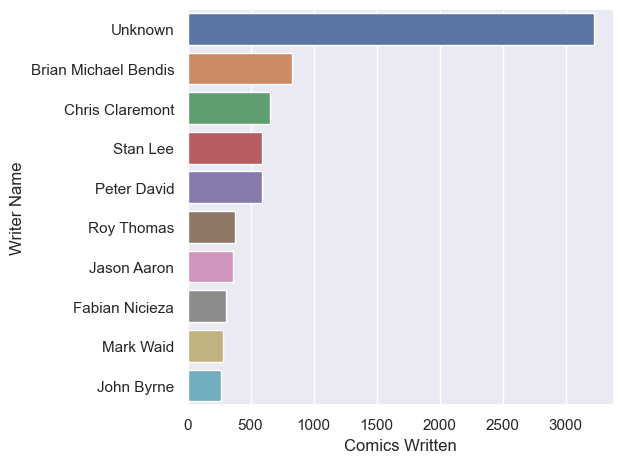

In [211]:
writer_counts = df["writer"].value_counts()
writer_counts = writer_counts[:10]

sns.set_theme(style = "darkgrid")
sns.barplot(x = writer_counts, y = writer_counts.index, hue = writer_counts.index)
plt.xlabel("Comics Written")
plt.ylabel("Writer Name")
plt.tight_layout()
plt.show()

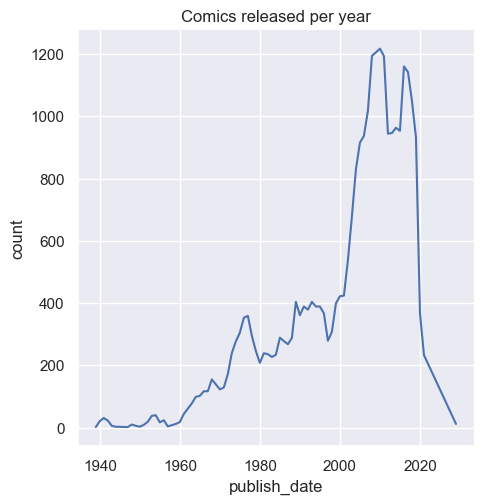

In [212]:
date_counts = df["publish_date"]
date_counts = date_counts.dt.year.value_counts()

sns.relplot(x = date_counts.index, y = date_counts,kind = "line")
plt.title("Comics released per year")
plt.show()

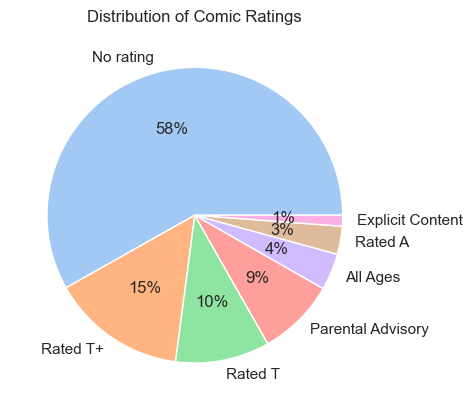

In [213]:
rating_counts = df["rating"].value_counts()

palette_color = sns.color_palette('pastel')
plt.pie(rating_counts, labels=rating_counts.index, colors=palette_color, autopct='%.0f%%')
plt.title("Distribution of Comic Ratings")
plt.show()

***Turning Into a CSV***

In [215]:
df

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,imprint,format,rating,price,publish_dates
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,2016-04-01,The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,0.00,2016-04-01
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,2016-08-10,"It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",Unknown,Marvel Universe,Infinite Comic,No rating,0.00,2016-08-10
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,2016-02-10,Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,Unknown,Marvel Universe,Infinite Comic,Rated T+,0.00,2016-02-10
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,2016-06-29,Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,No rating,0.00,2016-06-29
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,2016-06-15,Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,No rating,0.00,2016-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,2019-03-06,NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,3.99,2019-03-06
34988,Zombie (2006),(2006),Zombie (2006) #4,2006-12-20,With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,Explicit Content,3.99,2006-12-20
34989,Zombie (2006),(2006),Zombie (2006) #3,2006-11-29,The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,Explicit Content,3.99,2006-11-29
34990,Zombie (2006),(2006),Zombie (2006) #2,2006-10-25,"For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,Explicit Content,3.99,2006-10-25


In [214]:
df.to_csv('fixed_comics.csv', index=False)